# Experimenting with some basic sounding data access and plotting

Cribbing from https://unidata.github.io/siphon/latest/examples/upperair/Wyoming_Request.html#sphx-glr-examples-upperair-wyoming-request-py and https://unidata.github.io/MetPy/latest/tutorials/upperair_soundings.html

## Access some sounding data using siphon library

In [15]:
from datetime import datetime
import metpy
from metpy.units import units
from metpy.plots import Hodograph, SkewT
from siphon.simplewebservice.wyoming import WyomingUpperAir
import matplotlib.pyplot as plt

In [39]:
date = datetime(2021, 9, 10, 12)
station = 'ALB'

In [40]:
df = WyomingUpperAir.request_data(date, station)

In [41]:
df.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1000.0,95,16.0,12.9,315.0,3.0,2.121320,-2.121320,ALB,72518,2021-09-10 12:00:00,42.69,-73.83,95.0,21.13
1,987.0,206,14.4,11.1,307.0,14.0,11.180897,-8.425410,ALB,72518,2021-09-10 12:00:00,42.69,-73.83,95.0,21.13
2,975.4,305,13.7,10.7,300.0,23.0,19.918584,-11.500000,ALB,72518,2021-09-10 12:00:00,42.69,-73.83,95.0,21.13
3,968.0,369,13.2,10.4,303.0,24.0,20.128094,-13.071337,ALB,72518,2021-09-10 12:00:00,42.69,-73.83,95.0,21.13
4,940.6,610,13.2,8.6,315.0,29.0,20.506097,-20.506097,ALB,72518,2021-09-10 12:00:00,42.69,-73.83,95.0,21.13


In [42]:
df.units

{'pressure': 'hPa',
 'height': 'meter',
 'temperature': 'degC',
 'dewpoint': 'degC',
 'direction': 'degrees',
 'speed': 'knot',
 'u_wind': 'knot',
 'v_wind': 'knot',
 'station': None,
 'station_number': None,
 'time': None,
 'latitude': 'degrees',
 'longitude': 'degrees',
 'elevation': 'meter',
 'pw': 'millimeter'}

## Very basic Skew-T plot

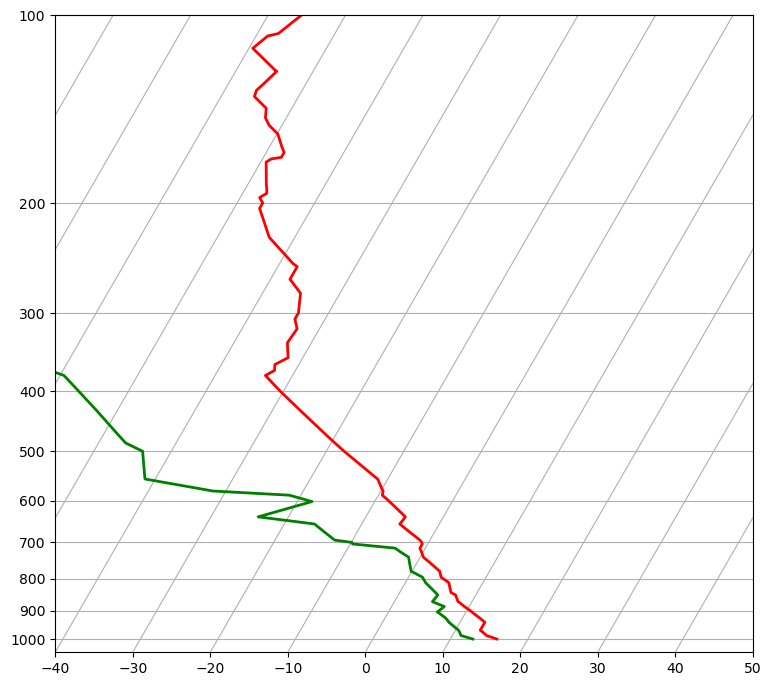

In [43]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
skew.plot(df['pressure'], df['temperature'], 'r', linewidth=2)
skew.plot(df['pressure'], df['dewpoint'], 'g', linewidth=2)

## Better: Attach units to values

In [44]:
pressure = df['pressure'].values * units(df.units['pressure'])
temperature = df['temperature'].values * units(df.units['temperature'])
dewpoint = df['dewpoint'].values * units(df.units['dewpoint'])
u_wind = df['u_wind'].values * units(df.units['u_wind'])
v_wind = df['v_wind'].values * units(df.units['v_wind'])

In [45]:
temperature

Magnitude,[16.0 14.4 13.7 13.2 13.2 13.2 12.2 10.9 10.8 9.4 8.5 8.2 7.4 6.6 5.6 5.6 4.2 3.7 3.6 1.6 0.4 -0.2 -0.7 -0.7 -0.9 -1.3 -3.4 -5.1 -5.0 -4.9 -8.1 -8.5 -9.5 -9.7 -10.0 -11.3 -11.5 -17.7 -19.5 -21.4 -26.2 -30.5 -33.2 -33.5 -32.7 -33.1 -31.9 -33.1 -32.9 -32.9 -33.9 -33.9 -33.9 -35.1 -37.5 -37.5 -38.3 -43.3 -46.7 -46.7 -47.5 -46.9 -47.2 -47.6 -49.3 -48.9 -47.7 -47.7 -48.4 -49.9 -51.7 -52.7 -53.3 -55.7 -55.9 -55.4 -54.7 -55.0 -57.7 -59.5 -58.5 -57.3 -55.7 -53.5 -57.5 -55.7 -56.0 -58.1 -59.7 -58.1 -60.1 -56.7 -58.5 -58.1 -55.9 -55.7 -55.9 -56.5 -56.4 -55.1 -55.1 -55.7 -56.5 -55.7 -53.9 -53.7 -53.0 -52.3 -53.3 -50.5 -51.7 -49.3 -49.3 -48.9 -48.7 -46.5 -46.5 -44.3 -45.6 -47.2 -47.7 -44.1 -39.5 -39.6]
Units,degree_Celsius


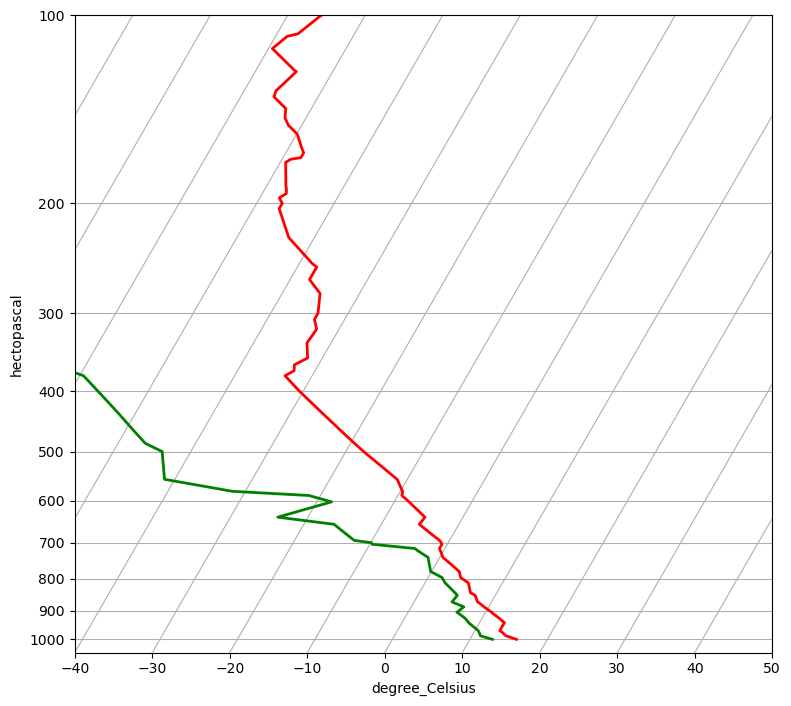

In [46]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
skew.plot(pressure, temperature, 'r', linewidth=2)
skew.plot(pressure, dewpoint, 'g', linewidth=2)

Same graph, but now the axes are automatically labelled with the correct units.